# Predicción de Precios de Vehículos Usados (Core)

**Objetivo:** implementar y evaluar modelos de regresión, y seleccionar el mejor modelo basado en las métricas de evaluación.

**Dataset:** Used Cars Dataset

**Descripción del Dataset:** Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios. El objetivo es predecir el precio de los autos basándose en sus características.

## **Requisitos:**

**1. Carga y Exploración de Datos:**
* Descargar y cargar el dataset.
* Realizar una exploración inicial para entender la estructura del dataset.
* Identificar valores faltantes, duplicados y outliers.

**2. Limpieza y Preprocesamiento:**
* Manejar valores faltantes.
* Eliminar duplicados.
* Corregir inconsistencias en los datos categóricos.
* Escalar las características numéricas.
* Realizar transformaciones necesarias para las características categóricas.

**3. Exploración de Datos:**
* Crear visualizaciones univariadas y multivariadas.
* Calcular estadísticas descriptiva
  
**4. Modelado y Evaluación:**
* Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
* Evaluar los modelos utilizando MSE, RMSE, y R^2.
* Seleccionar el mejor modelo basado en las métricas de evaluación.
  
**5. Optimización del Modelo:**
* Optimizar el modelo seleccionado utilizando GridSearchCV.

**6. Documentación y Entrega:**
* Documentar todo el proceso en un archivo .ipynb claramente comentado.
* Crear visualizaciones con interpretaciones.
* Subir el archivo a un repositorio en GitHub con un tag de liberación.

## *****************************************************************
## Contexto de las columnas:

1. **id:** entry ID
2. **url:** listing URL
3. **region:** craigslist region
4. **region_url:** region URL
5. **price:** entry price
6. **year:** entry year
7. **manufacturer:** manufacturer of vehicle
8. **model:** model of vehicle
9. **condition:** condition of vehicle
10. **cylinders:** number of cylinders
11. **fuel:** fuel type
12. **odometer:** miles traveled by vehicle
13. **title_status:** title status of vehicle
14. **transmission:** transmission of vehicle
15. **VIN:** vehicle identification number
16. **drive:** type of drive
17. **size:** size of vehicle
18. **type:** generic type of vehicle
19. **paint_color:** color of vehicle
20. **image_url:** image URL
21. **description:** listed description of vehicle
22. **county:** useless column left in by mistake
23. **state:** state of listing
24. **lat:** latitude of listing
25. **long:** longitude of listing
26. **posting_date:** Date of publication

*Traducido*

1. **id:** ID de entrada
2. **url:** URL listado
3. **region:** región de craigslist
4. **region_url:** URL de la región
5. **precio:** precio de entrada (Target)
6. **año:** año de entrada
7. **fabricante:** fabricante del vehículo
8. **modelo:** modelo del vehículo
9. **condición:** condición del vehículo (estado)
10. **cilindros:** número de cilindros
11. **combustible:** tipo de combustible
12. **odometro:** kilómetros recorridos por el vehículo
13. **estado_del_título:** estado del título del vehículo
14. **transmisión:** transmisión del vehículo
15. **VIN:** número de identificación del vehículo.
16. **transmisión:** tipo de transmisión.
17. **tamaño:** tamaño del vehículo
18. **tipo:** tipo genérico de vehículo.
19. **color_de_pintura:** color del vehículo.
20. **image_url:** URL de la imagen
21. **description:** descripción enumerada del vehículo
22. **county:** columna inútil dejada por error
23. **estado:** estado del listado
24. **latitud:** latitud de la lista
25. **long:** longitud del listado
26. **posting_date:** Fecha de publicación


## --------------------------------------------------------------------

### **1. Carga y Exploración de Datos:**
* Descargar y cargar el dataset.
* Realizar una exploración inicial para entender la estructura del dataset.
* Identificar valores faltantes, duplicados y outliers.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from utils import calculate_null, val_cat_unicos
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


In [29]:
# Cargar datos desde un archivo CSV
df_original= pd.read_csv(r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_2_machine_learning\3_prediccion_de_precios_de_vehiculos_usados\data\vehicles.csv')
df_original.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [30]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [31]:
# Identificar duplicados
duplicados = df_original.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### **2. Limpieza y Preprocesamiento:**
* Manejar valores faltantes.
* Eliminar duplicados.
* Corregir inconsistencias en los datos categóricos.
* Escalar las características numéricas.
* Realizar transformaciones necesarias para las características categóricas.



In [32]:
# Renombrar columnas del dataset
df_original.columns = (
    df_original.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df_original.columns)

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [33]:
# Eliminar columnas irrelevantes para el análisis
columns_to_drop = ['id', 'url', 'region','region_url', 'image_url', 'description', 'county', 'vin']
df_original.drop(columns=columns_to_drop, inplace=True)

# Manejar valores faltantes
# Rellenar valores numéricos con la mediana
df_original['year'] = df_original['year'].fillna(df_original['year'].median())
df_original['odometer'] = df_original['odometer'].fillna(df_original['odometer'].median())


# Rellenar valores categóricos con 'other'
categorical_columns = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
                       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

# Corregir inconsistencias los datos pasando a minúsculas para luego verificar valores unicos
df_original[categorical_columns] = df_original[categorical_columns].apply(lambda col: col.str.lower())

for col in categorical_columns:
    df_original[col] = df_original[col].fillna('other')

# Eliminar filas donde el precio sea 0 o atípico
df_original = df_original[df_original['price'] > 1000]
df_original = df_original[df_original['price'] < 100000]

# Convertir 'posting_date' a tipo datetime especificando UTC
df_original['posting_date'] = pd.to_datetime(df_original['posting_date'], utc=True)

# Verificar si las columnas han sido eliminadas y si los valores faltantes han sido manejados
calculate_null(df_original)


,datos sin NAs en q,Na en q,Na en %
long,375213,3446,0.91
lat,375213,3446,0.91
posting_date,378600,59,0.02
price,378659,0,0.00
year,378659,0,0.00
manufacturer,378659,0,0.00
fuel,378659,0,0.00
model,378659,0,0.00
condition,378659,0,0.00
cylinders,378659,0,0.00


In [34]:
val_cat_unicos(df_original)

Valores únicos en la columna 'manufacturer':
['other' 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'mercury' 'saturn'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']

Valores únicos en la columna 'model':
['other' 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 suburban' 'paige glenbrook touring']

Valores únicos en la columna 'condition':
['other' 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']

Valores únicos en la columna 'cylinders':
['other' '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders'
 '3 cylinders' '10 cylinders' '12 cylinders']

Valores únicos en la columna 'fuel':
['other' 'gas' 'diesel' 'hybrid' 'electric']

Valores únicos en la columna 'title_status

In [35]:
# Limpiar valores no imprimibles de la columna 'model'
import re
df_original['model'] = df_original['model'].apply(lambda x: re.sub(r'[^\x20-\x7E]', '', str(x)))


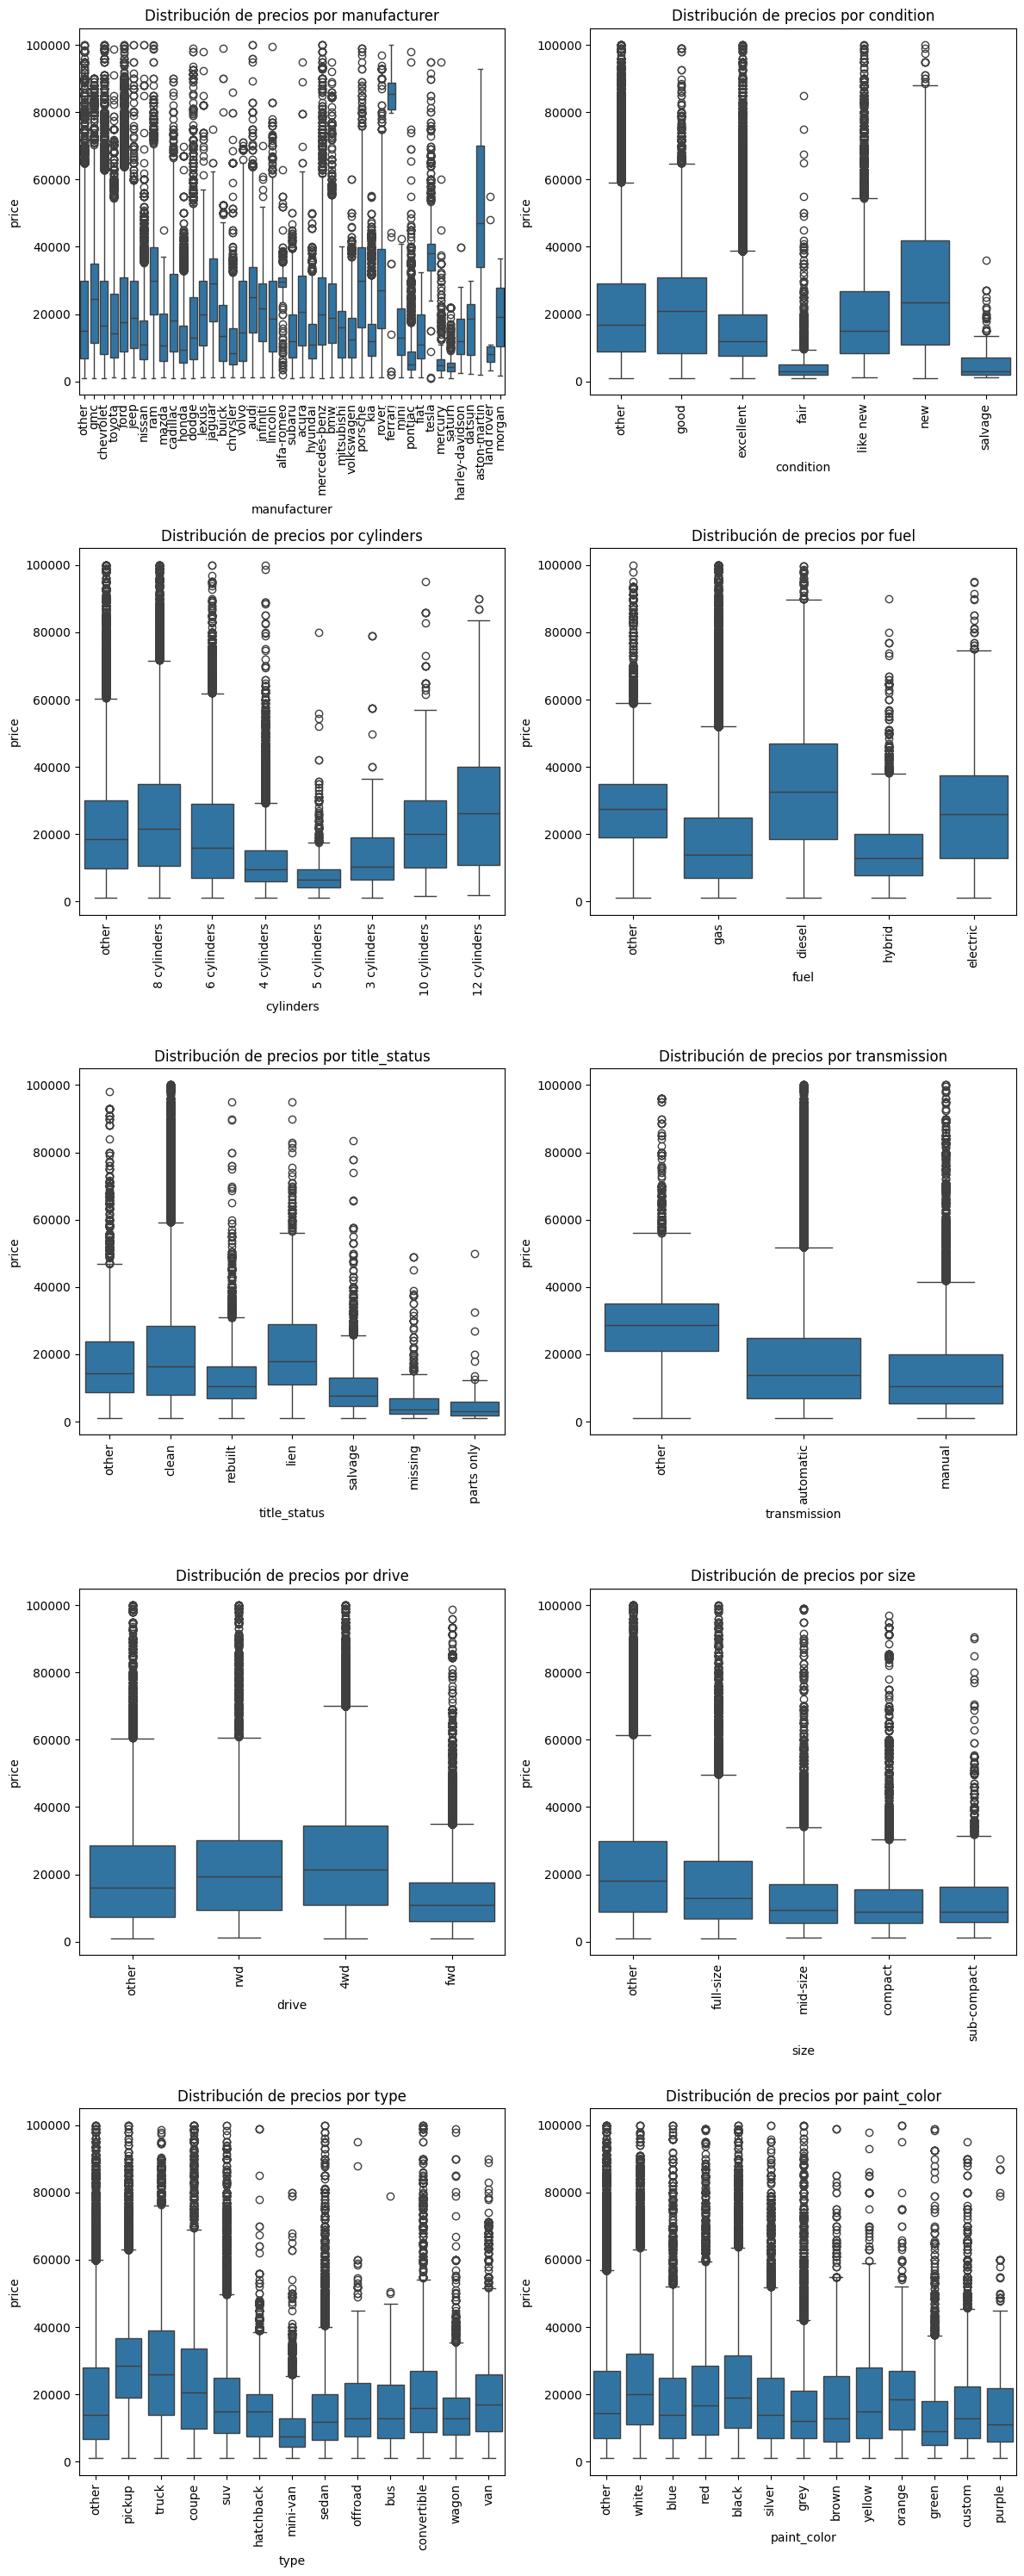

In [36]:
# Lista de columnas categóricas
categorical_columns = ['manufacturer', 'condition', 'cylinders', 'fuel',
                       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

# Número de subgráficos por fila (2 columnas)
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calcula el número de filas necesarias

# Crear la figura y los ejes para los subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()  # Convertir los ejes en un array 1D

# Iterar sobre cada columna categórica
for i, column in enumerate(categorical_columns):
    # Crear el boxplot para visualizar la distribución del precio por categoría
    sns.boxplot(data=df_original, x=column, y='price', ax=axes[i])
    axes[i].set_title(f'Distribución de precios por {column}')
    axes[i].tick_params(axis='x', rotation=90)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


In [ ]:
# Paso 1: Preprocesamiento de las características numéricas
numeric_columns = ['year', 'odometer']

# Escalar las características numéricas usando StandardScaler
scaler = StandardScaler()

# Paso 2: Transformación de las características categóricas
categorical_columns = ['manufacturer', 'condition', 'cylinders', 'fuel',
                       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

# Para las columnas con muchas categorías, usaremos OneHotEncoder
# Para las columnas con pocas categorías, usaremos OrdinalEncoder
high_cardinality_columns = ['manufacturer', 'cylinders', 'fuel', 'title_status', 
                            'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
low_cardinality_columns = ['condition']

# Paso 3: Crear el pipeline de preprocesamiento
# Aplicar transformación a las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_columns),  # Escalado de las columnas numéricas
        ('high_card', OneHotEncoder(handle_unknown='ignore'), high_cardinality_columns),  # Codificación One-Hot
        ('low_card', OrdinalEncoder(), low_cardinality_columns)  # Codificación Ordinal
    ])

# Paso 4: Separar las características (X) y la variable objetivo (y)
X = df_original.drop('price', axis=1)  # Características
y = df_original['price']  # Variable objetivo

# Paso 5: Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 6: Aplicar las transformaciones con el preprocesador
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Los datos están listos para ser utilizados en los modelos

# Verificar que las transformaciones se han realizado correctamente
print(f"X_train_transformed shape: {X_train_transformed.shape}")
print(f"X_test_transformed shape: {X_test_transformed.shape}")


X_train_transformed shape: (302927, 155)
X_test_transformed shape: (75732, 155)


### **3. Exploración de Datos:**
* Crear visualizaciones univariadas y multivariadas.
* Calcular estadísticas descriptiva

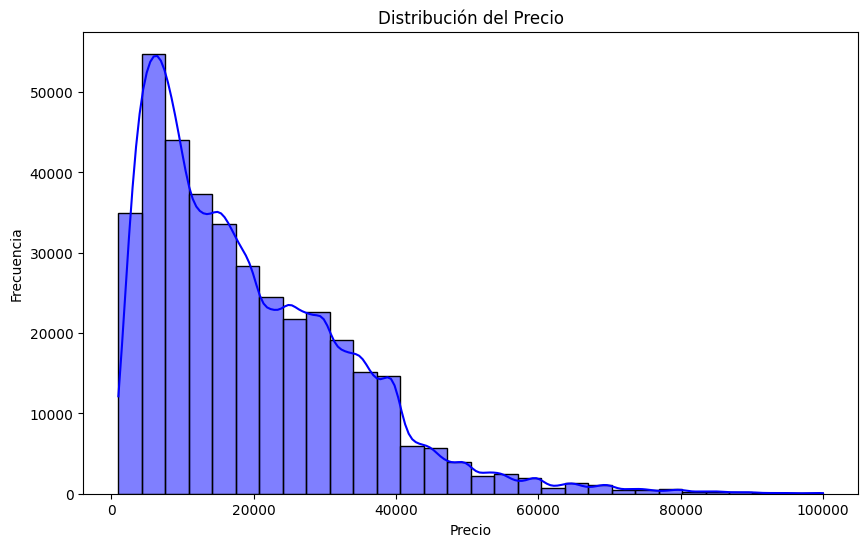

In [38]:
# Histograma del precio
plt.figure(figsize=(10, 6))
sns.histplot(df_original['price'], kde=True, color='blue', bins=30)
plt.title('Distribución del Precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

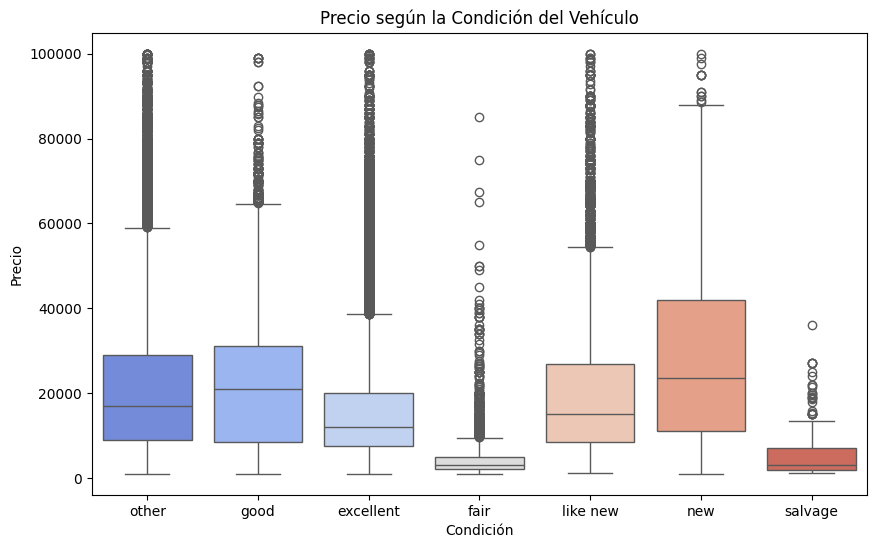

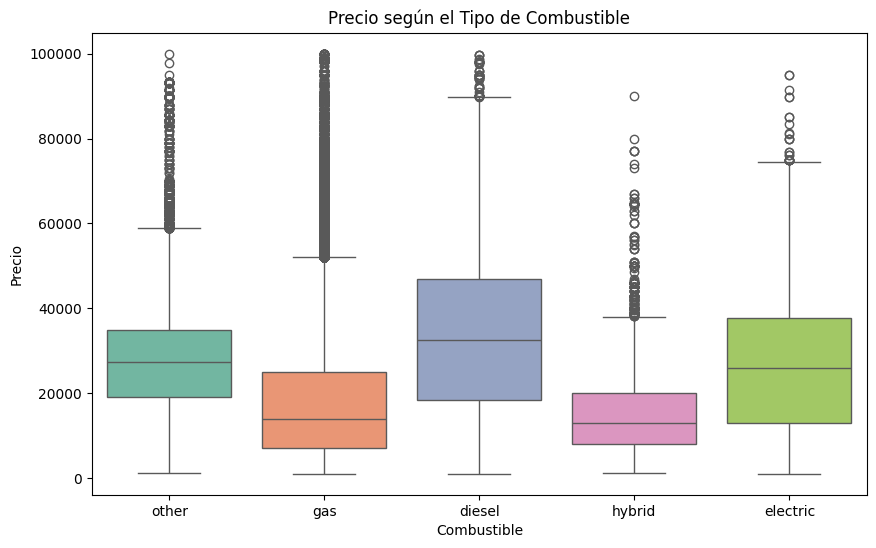

In [39]:
# Boxplot del precio por condición del vehículo
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df_original, hue='condition', palette='coolwarm', legend=False)
plt.title('Precio según la Condición del Vehículo')
plt.xlabel('Condición')
plt.ylabel('Precio')
plt.show()

# Boxplot del precio por tipo de combustible
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='price', data=df_original, hue='fuel', palette='Set2', legend=False)
plt.title('Precio según el Tipo de Combustible')
plt.xlabel('Combustible')
plt.ylabel('Precio')
plt.show()


price       1.000000
year        0.365195
lat        -0.005415
long       -0.097435
odometer   -0.197727
Name: price, dtype: float64


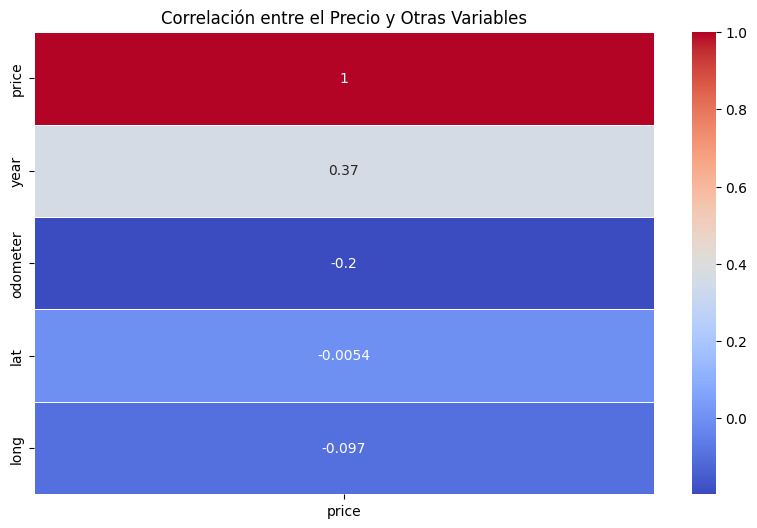

In [21]:
# Filtrar las columnas numéricas antes de calcular la correlación
numeric_df = df_original.select_dtypes(include=['float64', 'int64'])

# Correlación entre el precio y otras variables numéricas
correlation_matrix = numeric_df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))

# Visualizar la correlación con un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['price']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre el Precio y Otras Variables')
plt.show()


### **4. Modelado y Evaluación:**
* Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
* Evaluar los modelos utilizando MSE, RMSE, y R^2.
* Seleccionar el mejor modelo basado en las métricas de evaluación.


In [ ]:
# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train_transformed, y_train)
y_pred_linear = linear_model.predict(X_test_transformed)

# Evaluación del modelo
print(f'MSE (Regresión Lineal): {mean_squared_error(y_test, y_pred_linear)}')
print(f'R2 (Regresión Lineal): {r2_score(y_test, y_pred_linear)}')

MSE (Regresión Lineal): 107713979.14656293
R2 (Regresión Lineal): 0.4690715426848865


In [ ]:
# Modelo de Random Forest optimizado
rf_model = RandomForestRegressor(n_estimators=20, max_depth=10, n_jobs=-1, random_state=42)

# Entrenamiento del modelo
rf_model.fit(X_train_transformed, y_train)

# Predicción
y_pred_rf = rf_model.predict(X_test_transformed)

# Evaluación del modelo
print(f'MSE (Random Forest): {mean_squared_error(y_test, y_pred_rf)}')
print(f'R2 (Random Forest): {r2_score(y_test, y_pred_rf)}')


MSE (Random Forest): 48165750.53359116
R2 (Random Forest): 0.7625882190144662


### **5. Optimización del Modelo:**
* Optimizar el modelo seleccionado utilizando GridSearchCV.

Conclusión: Si, el árbol de decisión tiene un MSE más bajo y un R² más alto que los otros modelos, entonces podría ser el más adecuado para predecir el precio de autos.

In [ ]:
# Definimos las columnas
numeric_columns = ['year', 'odometer']
categorical_columns = ['manufacturer', 'condition', 'cylinders', 'fuel', 
                       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']

high_cardinality_columns = ['manufacturer', 'cylinders', 'fuel', 'title_status', 
                            'transmission', 'drive', 'size', 'type', 'paint_color', 'state']
low_cardinality_columns = ['condition']

# Preprocesamiento
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder()

# Crear un pipeline para el preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_columns),  # Escalado de las columnas numéricas
        ('high_card', one_hot_encoder, high_cardinality_columns),  # Codificación One-Hot
        ('low_card', ordinal_encoder, low_cardinality_columns)  # Codificación Ordinal
    ])

# Definir el modelo de RandomForest
rf_model = RandomForestRegressor(random_state=42)

# Crear un pipeline que incluye preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# 1. Dividir los datos en conjunto de entrenamiento y prueba
X = df_original.drop(columns=['price'])
y = df_original['price']

# 2. Seleccionar una muestra de los datos
percentage = 0.2
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=percentage, random_state=42)

# 3. Dividir los datos de muestra en entrenamiento y prueba
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# 4. Definir el espacio de hiperparámetros para la búsqueda aleatoria
param_dist = {
    'model__n_estimators': [10, 50],
    'model__max_depth': [10, 15, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}

# 5. Realizar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist,
                                   n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42,
                                   scoring='neg_mean_squared_error')

# 6. Ajustar el modelo con la muestra aleatoria de los datos
random_search.fit(X_train_sample, y_train_sample)

# 7. Ver los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search.best_params_}")

# 8. Evaluar el modelo optimizado en el conjunto de prueba
best_rf_model = random_search.best_estimator_
y_pred_optimized = best_rf_model.predict(X_test_sample)

# 9. Evaluación del modelo optimizado
mse = mean_squared_error(y_test_sample, y_pred_optimized)
r2 = r2_score(y_test_sample, y_pred_optimized)

print(f'MSE (Optimizado): {mse}')
print(f'R2 (Optimizado): {r2}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores parámetros: {'model__n_estimators': 50, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_depth': None, 'model__bootstrap': True}
MSE (Optimizado): 32865373.298539683
R2 (Optimizado): 0.8419015270320925


### **6. Documentación y Entrega:**
* Documentar todo el proceso en un archivo .ipynb claramente comentado.
* Crear visualizaciones con interpretaciones.
* Subir el archivo a un repositorio en GitHub con un tag de liberación.